# Pull Stats from Network
a. stein 7.5.2023

Here I'm trying a different approach to getting the statistics I want from drought tracks via the drought network that is more computationally efficient.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from tqdm.autonotebook import tqdm

import os
import sys
sys.path.append('../../../')
import ndrought.drought_network_v12 as dnet
import multiprocessing as mp


from queue import Queue
import gc
import pickle
sys.setrecursionlimit(int(1e4))

from dask.distributed import Client, LocalCluster, wait
import dask

import yaml

/tmp/ipykernel_2245897/2481197443.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


ImportError: /pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/rasterio/../../../libgdal.so.31: undefined symbol: TIFFGetStrileByteCountWithErr

In [ ]:
import networkx as nx

In [ ]:
test_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net_f25k_d1_rt20p_paired.pickle')

In [ ]:
test_adjdict = test_dnet.adj_dict

In [ ]:
test_nx = nx.DiGraph(test_adjdict)

In [ ]:
nx.all_simple_paths?

Signature: nx.all_simple_paths(G, source, target, cutoff=None)
Docstring:
Generate all simple paths in the graph G from source to target.

A simple path is a path with no repeated nodes.

Parameters
----------
G : NetworkX graph

source : node
   Starting node for path

target : nodes
   Single node or iterable of nodes at which to end path

cutoff : integer, optional
    Depth to stop the search. Only paths of length <= cutoff are returned.

Returns
-------
path_generator: generator
   A generator that produces lists of simple paths.  If there are no paths
   between the source and target within the given cutoff the generator
   produces no output.

Examples
--------
This iterator generates lists of nodes::

    >>> G = nx.complete_graph(4)
    >>> for path in nx.all_simple_paths(G, source=0, target=3):
    ...     print(path)
    ...
    [0, 1, 2, 3]
    [0, 1, 3]
    [0, 2, 1, 3]
    [0, 2, 3]
    [0, 3]

You can generate only those paths that are shorter than a certain
length by us

In [ ]:
test_nx.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
end_nodes = []

for key in test_adjdict.keys():
    if len(test_adjdict[key]) == 0:
        end_nodes.append(key)

end_nodes

[47,
 48,
 57,
 267,
 288,
 429,
 454,
 512,
 616,
 645,
 659,
 709,
 728,
 739,
 827,
 831,
 879,
 913,
 917,
 1009,
 1271,
 1273,
 1319,
 1321,
 1356,
 1357,
 1362,
 1367,
 1429,
 1481,
 1543,
 1561,
 1569,
 1577,
 1622,
 1623,
 1657,
 1698,
 1813]

In [ ]:
origin_nodes = [o.id for o in test_dnet.origins]
origin_nodes

[0,
 13,
 28,
 46,
 49,
 103,
 167,
 267,
 274,
 339,
 422,
 498,
 598,
 625,
 694,
 729,
 730,
 747,
 750,
 797,
 801,
 918,
 919,
 985,
 989,
 1025,
 1175,
 1218,
 1249,
 1283,
 1287,
 1306,
 1334,
 1383,
 1399,
 1411,
 1431,
 1440,
 1458,
 1523,
 1535,
 1584,
 1616,
 1637,
 1644,
 1661,
 1683,
 1692,
 1712,
 1718]

In [ ]:
for path in nx.all_simple_paths(test_nx, origin_nodes[0], end_nodes[0]):
    print(path)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 29, 32, 34, 36, 38, 40, 41, 42, 43, 44, 45, 47]


In [ ]:
# from chat GBT:
def get_paths(graph, start, end):
    paths = []
    for path in nx.all_simple_paths(graph, source=start, target=end):
        paths.append(path)
    return paths

In [ ]:
for start in tqdm(origin_nodes):
    for end in end_nodes:
        get_paths(test_nx, start, end)

  0%|          | 0/50 [00:00<?, ?it/s]

MWHAHAHAHAHA

In [ ]:
def find_longest_path(graph, start, end):
    paths = get_paths(graph, start, end)
    if len(paths) > 1:
        max_path = []
        for path in paths:
            if len(path) > len(max_path):
                max_path = path
        return max_path
    else:
        return paths

In [ ]:
paths = []

for start in tqdm(origin_nodes):
    for end in end_nodes:
        path = find_longest_path(test_nx, start, end)
        if len(path) > 0:
            paths.append(np.array(path).flatten())

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
paths

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20,
        22, 24, 26, 29, 32, 34, 36, 38, 40, 41, 42, 43, 44, 45, 47]),
 array([13, 15, 17, 19, 21, 23, 25, 27, 30, 33, 35, 37, 39, 41, 42, 43, 44,
        45, 47]),
 array([28, 31, 33, 35, 37, 39, 41, 42, 43, 44, 45, 47]),
 array([46, 48]),
 array([49, 50, 53, 55, 57]),
 array([ 49,  50,  52,  54,  56,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 104, 106,
        108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132,
        134, 136, 138, 140, 142, 144, 146, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

In [ ]:
test_nodes = test_dnet.nodes

In [ ]:
node_paths = []

for path in paths:
    node_path = []
    for id in path:
        node_path.append(test_nodes[id])
    node_paths.append(node_path)

node_paths

[[time: 6, id: 0,
  time: 7, id: 1,
  time: 8, id: 2,
  time: 9, id: 3,
  time: 10, id: 4,
  time: 11, id: 5,
  time: 12, id: 6,
  time: 13, id: 7,
  time: 14, id: 8,
  time: 15, id: 9,
  time: 16, id: 10,
  time: 17, id: 11,
  time: 18, id: 12,
  time: 19, id: 14,
  time: 20, id: 16,
  time: 21, id: 18,
  time: 22, id: 20,
  time: 23, id: 22,
  time: 24, id: 24,
  time: 25, id: 26,
  time: 26, id: 29,
  time: 27, id: 32,
  time: 28, id: 34,
  time: 29, id: 36,
  time: 30, id: 38,
  time: 31, id: 40,
  time: 32, id: 41,
  time: 33, id: 42,
  time: 34, id: 43,
  time: 35, id: 44,
  time: 36, id: 45,
  time: 37, id: 47],
 [time: 19, id: 13,
  time: 20, id: 15,
  time: 21, id: 17,
  time: 22, id: 19,
  time: 23, id: 21,
  time: 24, id: 23,
  time: 25, id: 25,
  time: 26, id: 27,
  time: 27, id: 30,
  time: 28, id: 33,
  time: 29, id: 35,
  time: 30, id: 37,
  time: 31, id: 39,
  time: 32, id: 41,
  time: 33, id: 42,
  time: 34, id: 43,
  time: 35, id: 44,
  time: 36, id: 45,
  time: 37, i

In [ ]:
times = []

for path in node_paths:
    times.append(path[-1].time - path[0].time)

In [ ]:
times

[31,
 18,
 11,
 1,
 4,
 274,
 386,
 400,
 447,
 491,
 524,
 528,
 225,
 337,
 351,
 398,
 442,
 475,
 479,
 184,
 296,
 310,
 357,
 401,
 434,
 438,
 7,
 142,
 156,
 203,
 247,
 280,
 284,
 10,
 5,
 10,
 24,
 71,
 115,
 148,
 152,
 15,
 16,
 34,
 3,
 27,
 60,
 64,
 27,
 60,
 64,
 25,
 24,
 282,
 318,
 323,
 424,
 429,
 433,
 497,
 577,
 282,
 318,
 323,
 424,
 429,
 433,
 497,
 577,
 228,
 264,
 269,
 370,
 375,
 379,
 443,
 523,
 9,
 202,
 238,
 243,
 344,
 349,
 353,
 417,
 497,
 54,
 90,
 95,
 196,
 201,
 205,
 269,
 349,
 18,
 44,
 49,
 150,
 155,
 159,
 223,
 303,
 11,
 10,
 17,
 7,
 21,
 40,
 13,
 32,
 8,
 27,
 65,
 70,
 74,
 138,
 218,
 62,
 67,
 71,
 135,
 215,
 54,
 59,
 63,
 127,
 207,
 26,
 31,
 35,
 99,
 179,
 4,
 18,
 18,
 43,
 123,
 27,
 107,
 4,
 19,
 99,
 9,
 89,
 82,
 71,
 68]

This looks like it'll work!

In [ ]:
centroids = []

for path in node_paths:
    centroid_path = []
    for node in path:
        centroid = node.coords.mean(axis=0)
        

In [ ]:
node_paths[0][0].coords.mean(axis=0)

array([494.71213048, 379.25412844])

In [ ]:
def compile_drought_tracks(args):
    x_list = []
    y_list = []
    u_list = []
    v_list = []
    t_list = []
    alpha_list = []
    s_list = []
    sf_list = []

    (path, net_centroids, s_thresh, ratio_thresh, cmap) = args

    for current_id, future_id in zip(path[:-1], path[1:]):            
            x, y, t, s = net_centroids[current_id]
            
            if s > s_thresh:
                u, v, __, s_f = net_centroids[future_id]
                if s_f > ratio_thresh*s:

                    x_list.append(x)
                    y_list.append(y)
                    u_list.append(u-x)
                    v_list.append(v-y)
                    t_list.append(t)

                    alpha_list.append(np.min((s_f/s, s/s_f)))
                    s_list.append(s)
                    sf_list.append(s_f)

    if len(t_list) > 0:
        t_min = np.min(t_list)
        t_max = np.max(t_list)
        color_list = [cmap(np.round((t-t_min)/(t_max-t_min), 4))[:-1] for t in t_list]

    return x_list, y_list, u_list, v_list, t_list, color_list, alpha_list, s_list, sf_list

In [ ]:
data = xr.open_dataarray('/pool0/home/steinadi/data/drought/drought_impact/data/thresh_experiments/spi30d/spi30d_usdmcat_CONUS_105W.nc')

x_coords = data.x.values
y_coords = data.y.values

coord_meta = (
    np.min(y_coords), np.max(y_coords), len(y_coords),
    np.min(x_coords), np.max(x_coords), len(x_coords)
)

In [ ]:
def to_y(y, y_meta):
    y_min, y_max, y_spacing = y_meta
    return ((y_min-y_max)/y_spacing)*(y)+y_max

def to_x(x, x_meta):
    x_min, x_max, x_spacing = x_meta
    return ((x_max-x_min)/x_spacing)*(x)+x_min

def to_xy(coord, coord_meta):
    y_min, y_max, y_spacing, x_min, x_max, x_spacing = coord_meta

    y_meta = (y_min, y_max, y_spacing)
    x_meta = (x_min, x_max, x_spacing)

    y, x = coord
    return (to_x(x, x_meta), to_y(y, y_meta))

In [ ]:
net_centroids = {node.id:(*to_xy(node.coords.mean(axis=0), coord_meta), node.time, len(node.coords)) for node in test_dnet.nodes}

In [ ]:
x_list, y_list, u_list, v_list, t_list, color_list, alpha_list, s_list, sf_list = compile_drought_tracks((paths[0], net_centroids, 0, 0, plt.cm.get_cmap('viridis')))

In [ ]:
sf_list

[9810,
 10920,
 10543,
 6887,
 7162,
 6156,
 7538,
 7775,
 7293,
 7294,
 9183,
 9711,
 15333,
 15333,
 16881,
 18253,
 18650,
 18650,
 19178,
 3508,
 8100,
 5549,
 6809,
 7329,
 9090,
 41321,
 44994,
 49498,
 36684,
 36582,
 37194]

## Let's check changing filtering by area

In [ ]:
spi30d_net_a = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/thresh_experiments/spi30d/dnet/net_0a_00r_1m.pickle')
spi30d_net_b = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/thresh_experiments/spi30d/dnet/net_200a_00r_1m.pickle')

spi30d_net_a.area_thresh_removal(thresh=200)

spi30d_net_a.pickle('net_0a_00r_1m_cut200.pickle')

In [ ]:
spi30d_net_a_cut = dnet.DroughtNetwork.unpickle('net_0a_00r_1m_cut200.pickle')

### Now to check for equivalency ... even though node ids are different

In [ ]:
len(spi30d_net_a_cut.nodes)

17753

In [ ]:
len(spi30d_net_b.nodes)

17753

Okay, that's promising

In [ ]:
len(spi30d_net_a_cut.origins)

1348

In [ ]:
len(spi30d_net_b.origins)

4708

Hm. not as promising

In [ ]:
len(spi30d_net_a.origins)

231887

So it did slim things down ... just too much?

In [ ]:
spi30d_net_b.area_thresh_removal(thresh=200)

Searching:   0%|          | 0/17753 [00:00<?, ?it/s]

Removing: 0it [00:00, ?it/s]

Now to go through all the nodes I suppose?

In [ ]:
found_a = []
found_b = []

t = tqdm(total=len(spi30d_net_a_cut.origins)*len(spi30d_net_b.origins))

for node_a in spi30d_net_a_cut.origins:
    for node_b in spi30d_net_b.origins:
        if len(node.coords) == len (node_a.coords) and np.all(node_a.coords == node_b.coords):
            found_a.append(node_a)
            found_b.append(node_b)
        t.update()

  0%|          | 0/6346384 [00:00<?, ?it/s]

In [ ]:
len(found_a)

0

In [ ]:
len(found_b)

0

In [ ]:
not_found = []
for node in spi30d_net_b.origins:
    if not node in found_b:
        not_found.append(node)

Okay, is it an area thing?

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

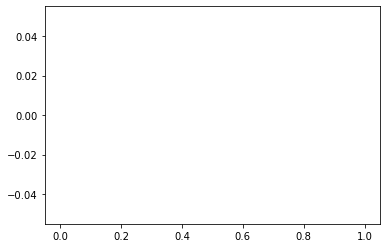

In [ ]:
plt.hist([node.area for node in found_b])

(array([4.421e+03, 2.000e+02, 5.000e+01, 1.700e+01, 1.200e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([  201. ,  1985.9,  3770.8,  5555.7,  7340.6,  9125.5, 10910.4,
        12695.3, 14480.2, 16265.1, 18050. ]),
 <BarContainer object of 10 artists>)

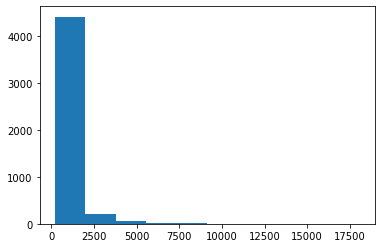

In [ ]:
plt.hist([node.area for node in not_found])

No.

Let's find those nodes within the larger network

In [ ]:
lost_origin = []

for node in tqdm(not_found):
    i = 0
    searching = True
    while i < len(spi30d_net_a_cut.nodes) and searching:
        node_a = spi30d_net_a_cut.nodes[i]
        if len(node.coords) == len (node_a.coords) and np.all(node.coords == node_a.coords):
            lost_origin.append(node_a)
            searching = False
        else:
            i += 1

  0%|          | 0/4708 [00:00<?, ?it/s]

In [ ]:
for node in lost_origin:
    print(node.past)    

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [ ]:
def area_thresh_removal(net, thresh:int):
    """Removes nodes based on an area threshold.

    Parameters
    ----------
    thresh: int
        If a node's area is less than or equal
        to this value, it is removed from the
        DroughtNetwork
    
    """
    to_remove = []
    for node in tqdm(net.nodes, desc='Searching'):
        if node.area <= thresh:
            to_remove.append(node)
    
    for node in tqdm(to_remove, desc='Removing'):
        for past_node in node.past:
            past_node.future.remove(node)
        for future_node in node.future:
            future_node.past.remove(node)
        net.nodes.remove(node)
        if node in net.origins:
            net.origins.remove(node)

    # we forgot to add back in origins
    for node in tqdm(net.nodes, desc='Adding new origins'):
        if len(node.past) == 0 and not node in net.origins:
            net.origins.append(node)

In [ ]:
area_thresh_removal(spi30d_net_a, 200)

Searching:   0%|          | 0/481836 [00:00<?, ?it/s]

Removing:   0%|          | 0/464083 [00:00<?, ?it/s]